In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
warnings.filterwarnings('ignore')
lreg = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
knn = KNeighborsRegressor()
lreg1 = LinearRegression()
dt1 = DecisionTreeRegressor()
rf1 = RandomForestRegressor()
knn1 = KNeighborsRegressor()

from sklearn.metrics import r2_score

In [13]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [14]:
#Data set has 7752 rows × 25 columns
df.info()
#There is missing data in many columns apart from Lat, lon, dem, slope and solar radiation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [15]:
# dropping all null values as the data loss will not be more than 5%
df=df.dropna()
df.shape

(7588, 25)

In [16]:
7588/7752
#Only 2% data is lost

0.9788441692466461

In [17]:
#Converting date into separate columns of day, month and year.
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['year'],df['month'],df['day'] = df.Date.dt.year, df.Date.dt.month, df.Date.dt.day
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,6,30
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,6,30
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,6,30
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013,6,30
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,2017,8,30
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,2017,8,30
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,2017,8,30
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,2017,8,30


In [18]:
df.drop('Date', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Present_Tmax      7588 non-null   float64
 2   Present_Tmin      7588 non-null   float64
 3   LDAPS_RHmin       7588 non-null   float64
 4   LDAPS_RHmax       7588 non-null   float64
 5   LDAPS_Tmax_lapse  7588 non-null   float64
 6   LDAPS_Tmin_lapse  7588 non-null   float64
 7   LDAPS_WS          7588 non-null   float64
 8   LDAPS_LH          7588 non-null   float64
 9   LDAPS_CC1         7588 non-null   float64
 10  LDAPS_CC2         7588 non-null   float64
 11  LDAPS_CC3         7588 non-null   float64
 12  LDAPS_CC4         7588 non-null   float64
 13  LDAPS_PPT1        7588 non-null   float64
 14  LDAPS_PPT2        7588 non-null   float64
 15  LDAPS_PPT3        7588 non-null   float64
 16  LDAPS_PPT4        7588 non-null   float64


<AxesSubplot:>

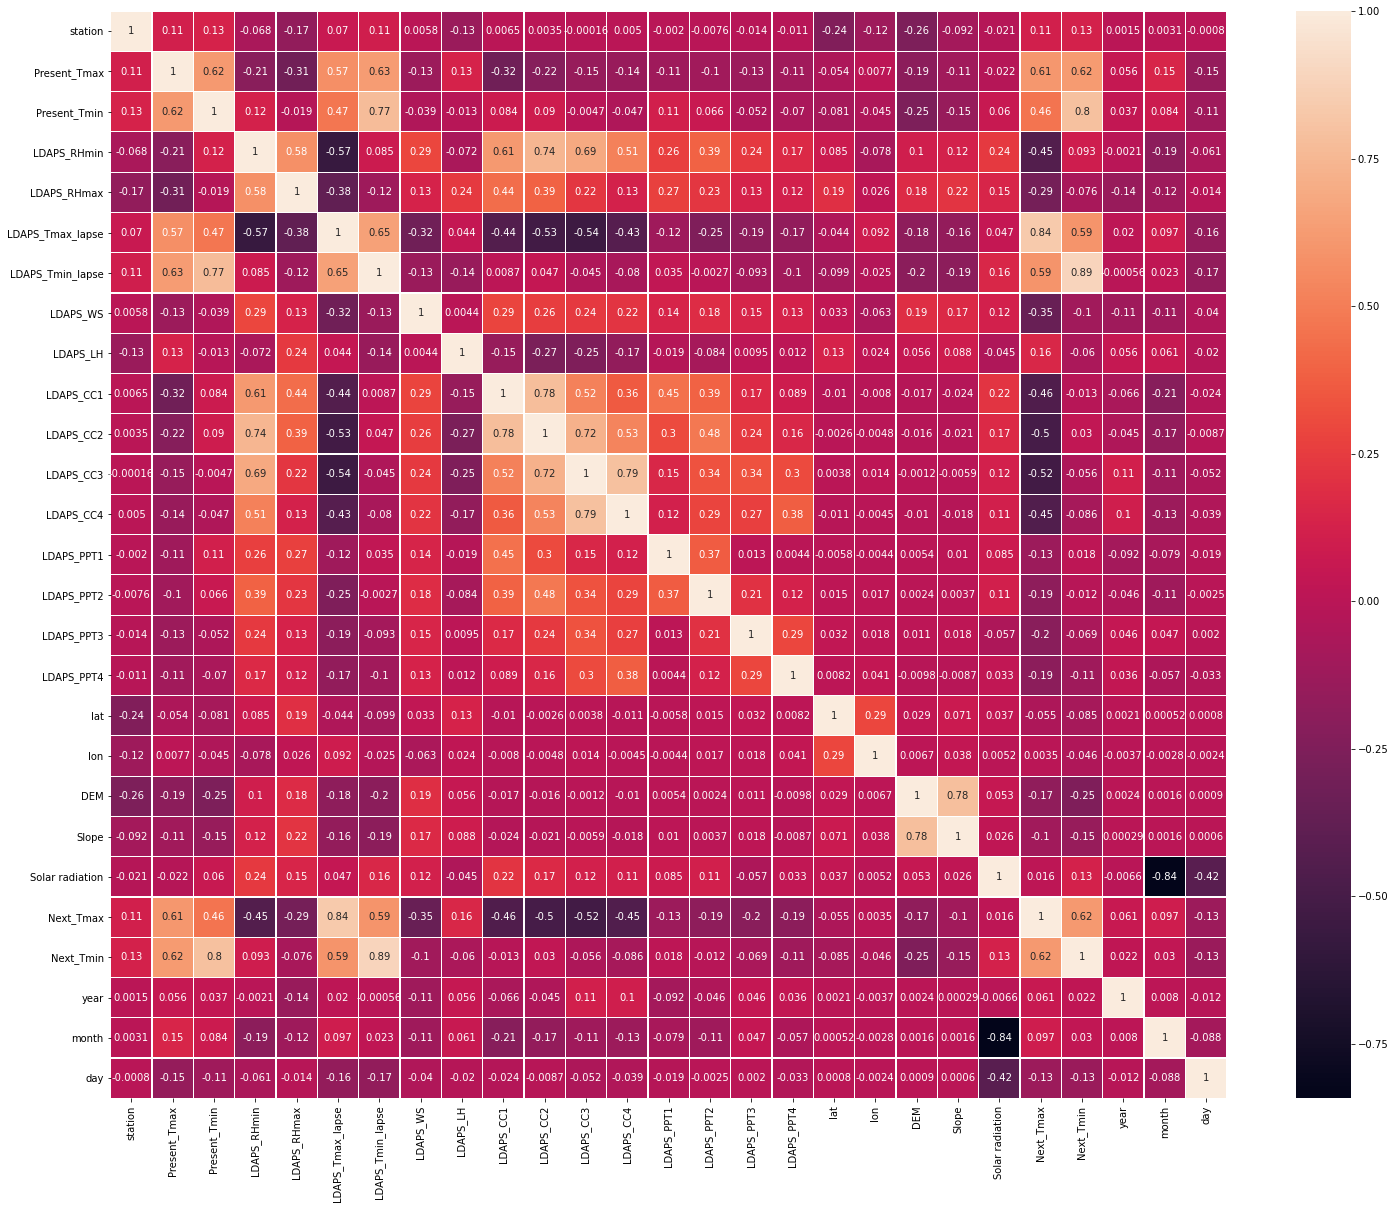

In [24]:
#All values are in numerical form. We can go ahead and treat the data.
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, linewidths=0.1)

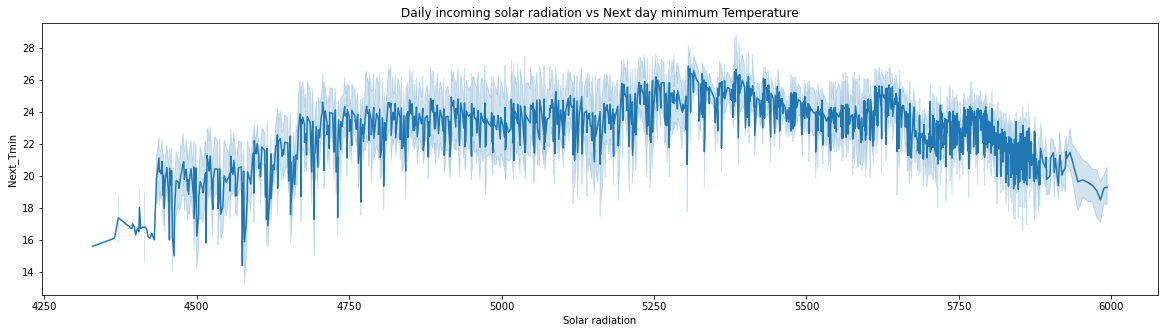

In [25]:
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day minimum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmin',data=df)
plt.show()

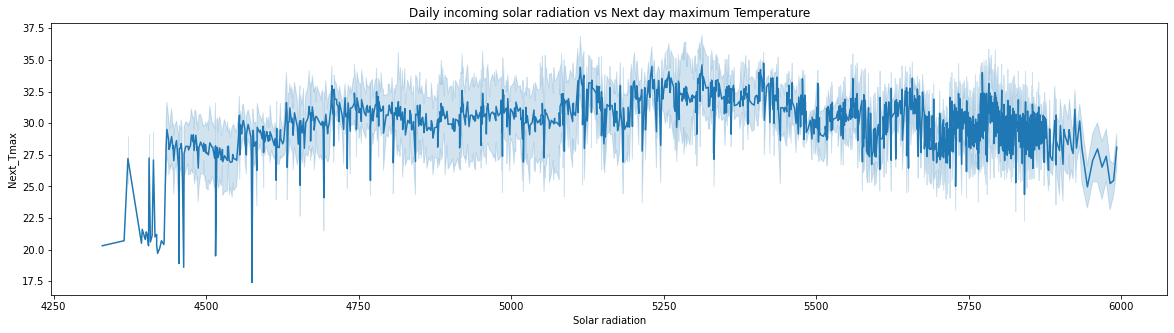

In [26]:
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day maximum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=df)
plt.show()

Both, the next day minimum and maximum temperatures increase as per the solar radiation. There is high correlation,

Text(0, 0.5, 'Next_Tmax')

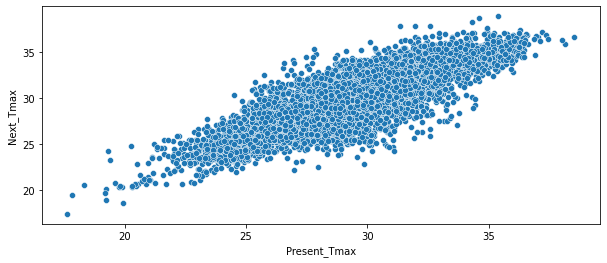

In [27]:
plt.figure(figsize=(10,4))
sns.scatterplot(df['LDAPS_Tmax_lapse'], df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

Text(0, 0.5, 'Next_Tmin')

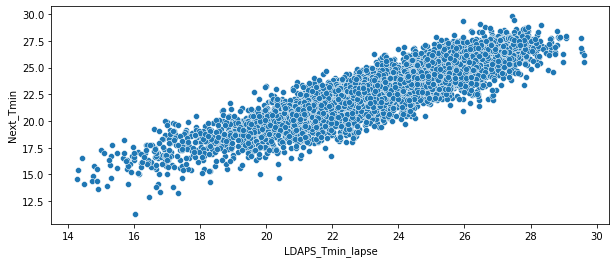

In [28]:
#There is linear correlation between With LDAPS_Tmax_lapse and Next_temp 
plt.figure(figsize=(10,4))
sns.scatterplot(df['LDAPS_Tmin_lapse'], df['Next_Tmin'])
plt.xlabel('LDAPS_Tmin_lapse')
plt.ylabel('Next_Tmin')

Text(0, 0.5, 'Next_Tmin')

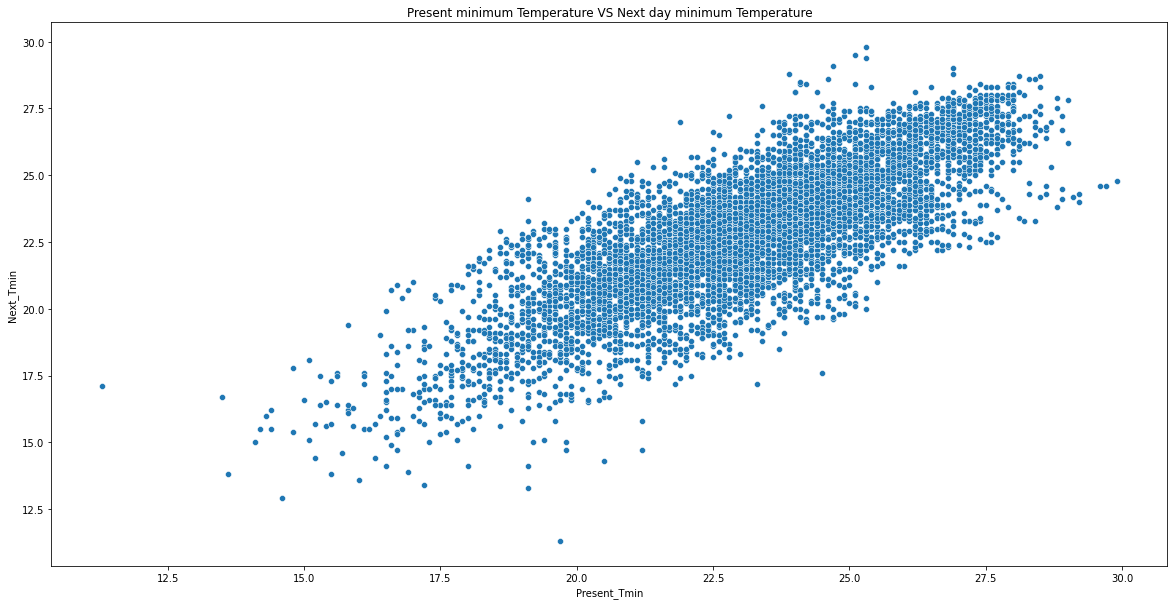

In [30]:
#There is reverse linear correlation between With LDAPS_Tmin_lapse and next_temp
plt.figure(figsize=(20,10))
plt.title('Present minimum Temperature VS Next day minimum Temperature')
sns.scatterplot(df['Present_Tmin'], df['Next_Tmin'])
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmin')
#Again, a linear correlation between present and next day min temps

Text(0, 0.5, 'Next_Tmax')

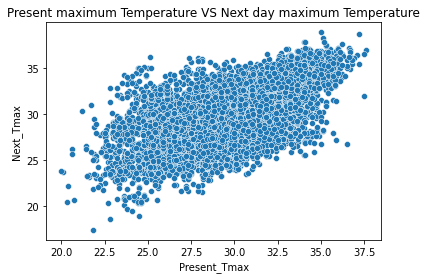

In [31]:
plt.title('Present maximum Temperature VS Next day maximum Temperature')
sns.scatterplot(df['Present_Tmax'], df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')
#Similarly, a linear correlation between present and next day max temps. However, more variance is observed.

In [32]:
df.skew()
#There are certain outliers that need to be detected and removed.

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
year                0.013575
month              -0.174856
day                -0.010718
dtype: float64

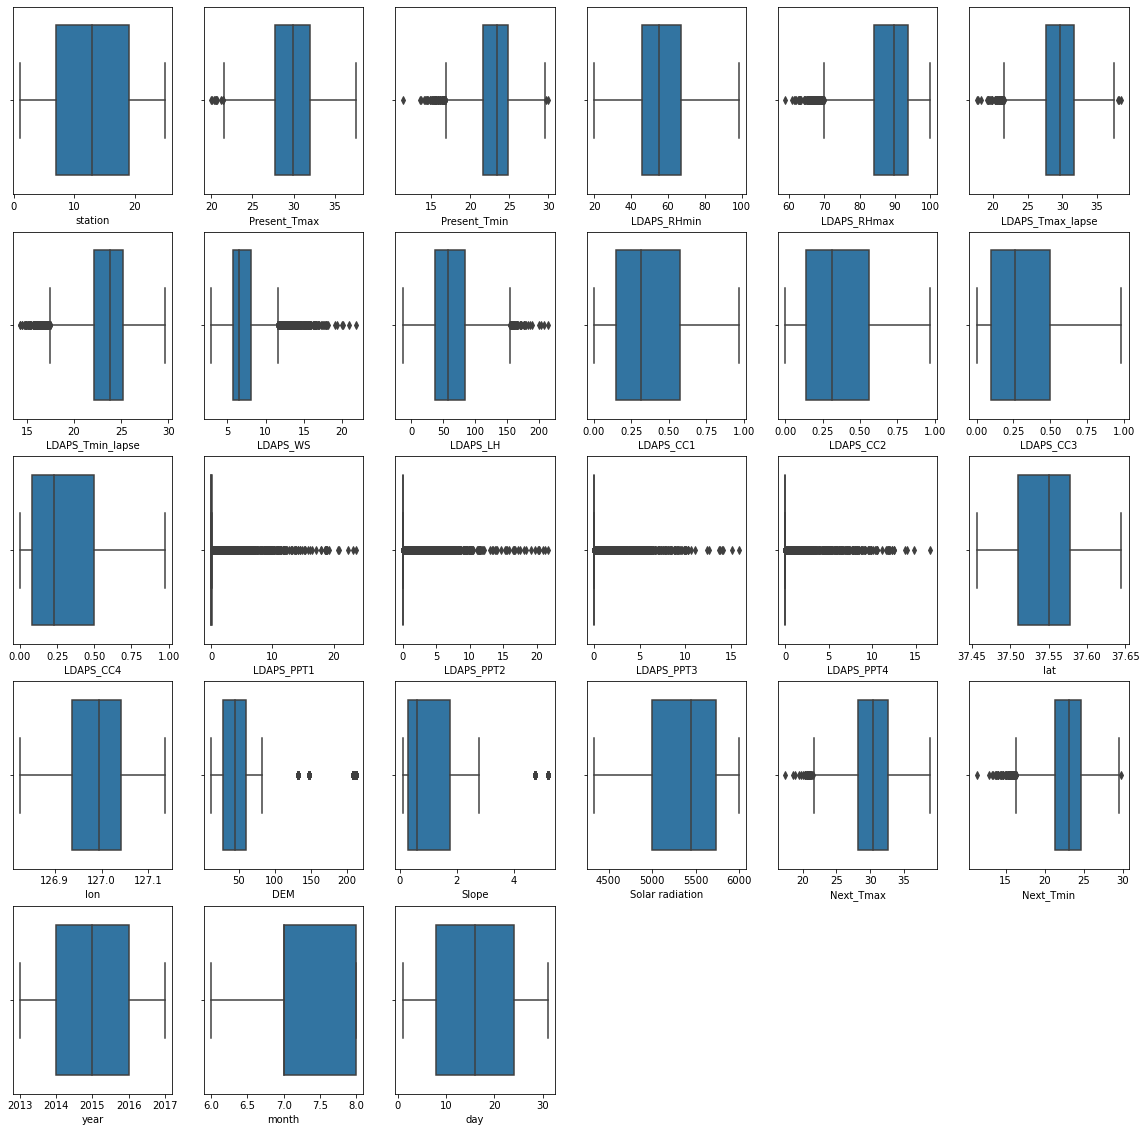

In [33]:
plt.figure(figsize=(20,20))
gr = 1
for c in df:
    ax = plt.subplot(5, 6, gr)
    sns.boxplot(df[c])
    plt.xlabel(c, fontsize = 10)
    gr+=1
plt.show()

In [44]:
#Removing outliers using zscore.
from scipy.stats import zscore
z=np.abs(zscore(df))
dfn=df[(z<3.5).all(axis=1)]
dfn.shape

(6979, 27)

In [45]:
#A lot of data is lost beyond 3.5. So, using yeo johnson to remove skew.
dfn.skew()

station            -0.003134
Present_Tmax       -0.295735
Present_Tmin       -0.300269
LDAPS_RHmin         0.317694
LDAPS_RHmax        -0.759415
LDAPS_Tmax_lapse   -0.143238
LDAPS_Tmin_lapse   -0.476199
LDAPS_WS            1.157554
LDAPS_LH            0.613055
LDAPS_CC1           0.564380
LDAPS_CC2           0.499229
LDAPS_CC3           0.693125
LDAPS_CC4           0.703111
LDAPS_PPT1          3.788606
LDAPS_PPT2          4.721503
LDAPS_PPT3          5.523137
LDAPS_PPT4          5.973295
lat                 0.095423
lon                -0.279686
DEM                 1.739074
Slope               1.579401
Solar radiation    -0.523191
Next_Tmax          -0.292374
Next_Tmin          -0.313213
year                0.011720
month              -0.160701
day                -0.008593
dtype: float64

In [48]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer(method='yeo-johnson', standardize=True)
for i in df.columns:
    if abs(dfn.loc[:,i].skew())>0.5:
        dfn.loc[:,i]=PT.fit_transform(dfn.loc[:,i].values.reshape(-1,1))

In [49]:
dfn.skew()

station            -0.003134
Present_Tmax       -0.295735
Present_Tmin       -0.300269
LDAPS_RHmin         0.317694
LDAPS_RHmax        -0.110826
LDAPS_Tmax_lapse   -0.143238
LDAPS_Tmin_lapse   -0.476199
LDAPS_WS            0.008919
LDAPS_LH           -0.024638
LDAPS_CC1           0.062959
LDAPS_CC2           0.499229
LDAPS_CC3           0.095016
LDAPS_CC4           0.139215
LDAPS_PPT1          1.564021
LDAPS_PPT2          1.785298
LDAPS_PPT3          1.948233
LDAPS_PPT4          2.222658
lat                 0.095423
lon                -0.279686
DEM                 0.039876
Slope               0.233948
Solar radiation    -0.176797
Next_Tmax          -0.292374
Next_Tmin          -0.313213
year                0.011720
month              -0.160701
day                -0.008593
dtype: float64

In [ ]:
dfn.drop(['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4'], axis = 1, inplace = True)

In [54]:
#Going ahead with the analysis. There is high skew in ldpan values. Removing them.
y = dfn[["Next_Tmax", "Next_Tmin"]]
X = dfn.drop(["Next_Tmax","Next_Tmin"], axis=1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
knn.fit(X_train, y_train['Next_Tmax'])
lreg.fit(X_train, y_train['Next_Tmax'])
rf.fit(X_train, y_train['Next_Tmax'])
dt.fit(X_train, y_train['Next_Tmax'])
knn1.fit(X_train, y_train['Next_Tmin'])
lreg1.fit(X_train, y_train['Next_Tmin'])
rf1.fit(X_train, y_train['Next_Tmin'])
dt1.fit(X_train, y_train['Next_Tmin'])
print(knn.score(X_test, y_test['Next_Tmax']), lreg.score(X_test, y_test['Next_Tmax']), rf.score(X_test, y_test['Next_Tmax']), 
                                                                        dt.score(X_test, y_test['Next_Tmax']))
print(knn1.score(X_test, y_test['Next_Tmin']), lreg1.score(X_test, y_test['Next_Tmin']), rf1.score(X_test, y_test['Next_Tmin']), 
                                                                               dt1.score(X_test, y_test['Next_Tmin']))

0.7731276988404472 0.7613081682359233 0.8933153151910065 0.7426656611518601
0.8102399501509165 0.8115294362997058 0.8863623082257954 0.7582897195105497


In [61]:
#Random forest is the best model. Performing gridsearchcv on it.
from sklearn.model_selection import GridSearchCV
params = {'bootstrap': [True, False],
          'n_estimators': [100, 150, 200],
          'max_depth': [13, 15, 17],
         'min_samples_split': [5, 10],
         'min_samples_leaf': [5, 10]}
grd = GridSearchCV(rf, param_grid = params)
grd.fit(X_train, y_train['Next_Tmax'])

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [13, 15, 17],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 150, 200]})

In [62]:
rf = grd.best_estimator_
rf.fit(X_train, y_train['Next_Tmax'])
rf.score(X_test, y_test['Next_Tmax'])

0.8845573296725727

In [63]:
#There is not much difference. performing cv on the other parameter
params = {'bootstrap': [True, False],
          'n_estimators': [100, 150, 200],
          'max_depth': [13, 15, 17],
         'min_samples_split': [5, 10],
         'min_samples_leaf': [5, 10]}
grd = GridSearchCV(rf1, param_grid = params)
grd.fit(X_train, y_train['Next_Tmin'])

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [13, 15, 17],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 150, 200]})

In [64]:
rf1 = grd.best_estimator_
rf1.fit(X_train, y_train['Next_Tmin'])
rf1.score(X_test, y_test['Next_Tmin'])

0.877600896126306

In [65]:
#The problem of overfitting does not exist. The accuracy is still high. Saving the files.
import pickle
filename = 'Tempmax.pickle'
pickle.dump(rf, open(filename, 'wb'))
filename = 'Tempmin.pickle'
pickle.dump(rf1, open(filename, 'wb'))